In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py
%run ../Scripts/plotVelocity.py

In [2]:
foldername_itr = []
betas = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,]
seeds = [0, 1, 2]
for beta in betas:
    for seed in seeds:
        foldername = f"../Data_Parallel/beta{beta}_seed{seed}"
        foldername_itr.append(foldername)

/Users/zhizhang144515/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhizhang144515/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/zhizhang144515/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zhizhang144515/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/zhizhang144515/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


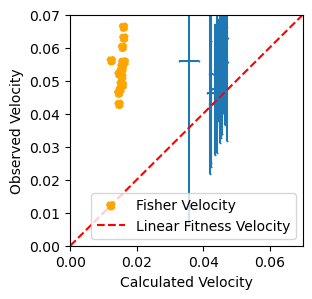

In [4]:
plot_velocity(foldername_itr)

In [6]:
def get_count_single(init_list, params, sim_params):
    count_all_root = []

    for root_node in init_list:
        for trajs in root_node.get_all_traversals():
            positions = [x.mean for x in trajs]
            time = [x.frame for x in trajs]
            time_avg = average_of_pairs(time)
            
            counts = np.array([x.count for x in trajs])
            if len(counts)>0:
                count_all_root.extend(counts)
            # count_all_root = np.concatenate([count_all_root, np.mean(counts)], axis=0)

    return  np.mean(count_all_root), np.var(count_all_root)

In [7]:
count_beta = np.zeros(len(betas))
var_count_beta = np.zeros(len(betas))

for foldername in foldername_itr:

    with open(foldername + "/params.json") as json_file:
        params = json.load(json_file)
    with open(foldername + "/sim_params.json") as json_file:
        sim_params = json.load(json_file)

    init_list = []
    tree_index = 0
    tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    while(os.path.isfile(tree_path)):
        # print("tree loaded:", tree_index)
        init_list.append(TreeNode.load_tree(tree_path))
        tree_index += 1
        tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    
        count, var_count = get_count_single(init_list, params, sim_params)
    print(count)
    
    index = betas.index(params["beta"])
    # print(i)
    count_beta[index] += count
    var_count_beta[index] += np.sqrt(var_count)

count_beta = count_beta/len(seeds)
var_count_beta = var_count_beta/len(seeds)

3630.2
705.17
6516.47
3795.16
5503.79
4304.22
3285.48
4116.82
4718.35
3940.61
5842.67
2085.87
2204.9
2204.9
2204.9
2146.04
2767.57
4268.1


In [8]:
def pi_exponent(beta):
    ratio = 0.1
    exponent = -2*(beta)*ratio/(np.sqrt(1+2*beta))
    res = np.sqrt(1+2*beta)*np.exp(exponent)
    return res

def ratio_exponent(beta):
    M = 1
    R = 20
    return 1/(np.power(R, 1/M)*(pi_exponent(beta)-1)+1)

In [9]:
count_beta_normalized = count_beta/count_beta[betas.index(0)]
var_beta_normalized = var_count_beta/(count_beta[betas.index(0)])
betas = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,]

In [10]:
betas = [-0.001, -0.01, -0.1, 0, 0.001, 0.01,]
count_beta_normalized = np.load('count_beta.npy')
var_beta_normalized = np.load('var_beta.npy')

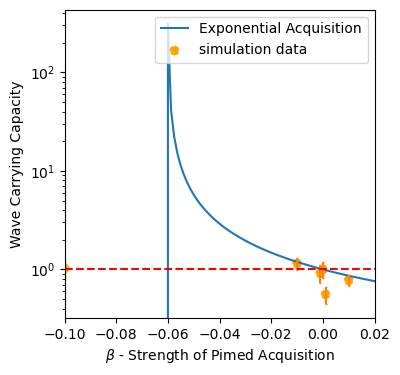

In [11]:
beta_range = np.linspace(-0.1, 0.02, 100)
plt.figure(figsize = [4, 4])
Y2 = ratio_exponent(beta_range)

plt.xlabel(r"$\beta$ - Strength of Pimed Acquisition")
plt.ylabel("Wave Carrying Capacity")
plt.xlim(-0.1, 0.02)
plt.plot(beta_range, Y2, label = "Exponential Acquisition")

plt.errorbar(betas, count_beta_normalized, yerr= var_beta_normalized,
                linestyle = "None", capsize = 1)

plt.scatter(betas, count_beta_normalized, color = "orange", linestyle = '--', label = "simulation data")

plt.plot(beta_range, np.ones_like(beta_range), linestyle = "--", color = "red")
# plt.vlines(0, min(Y2), max(Y2), linestyle = "--", color = "red")
plt.yscale('log')
plt.legend()